In [1]:
import pandas as pd

In [2]:
filepath = "data/"
train = pd.read_csv(filepath + "train.csv")
test = pd.read_csv(filepath + "test.csv")

In [3]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1.439424e+14,5651416,F,2016-05-03T08:47:46Z,2016-05-03T00:00:00Z,5,ITARARÉ,0,0,0,0,0,0
1,No,2.525147e+11,5683687,M,2016-05-11T07:46:04Z,2016-05-11T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,1,0
2,No,7.329774e+13,5604719,F,2016-04-20T08:15:21Z,2016-05-16T00:00:00Z,48,JESUS DE NAZARETH,0,0,0,1,0,0
3,Yes,2.737400e+13,5548139,M,2016-04-06T08:08:58Z,2016-05-09T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,0
4,No,1.777157e+13,5729822,F,2016-05-24T07:52:57Z,2016-05-24T00:00:00Z,68,PIEDADE,0,1,1,0,0,0


In [4]:
train.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.073600e+04,7.073600e+04,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000
mean,1.479324e+14,5.675340e+06,37.106608,0.099299,0.197636,0.072014,0.030480,0.022379,0.321350
std,2.564923e+14,7.140205e+04,23.080635,0.299065,0.398219,0.258513,0.171904,0.162053,0.466998
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.143725e+12,5.640499e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680842e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.458326e+13,5.725678e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790481e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         70736 non-null  object 
 1   PatientId       70736 non-null  float64
 2   AppointmentID   70736 non-null  int64  
 3   Gender          70736 non-null  object 
 4   ScheduledDay    70736 non-null  object 
 5   AppointmentDay  70736 non-null  object 
 6   Age             70736 non-null  int64  
 7   Neighbourhood   70736 non-null  object 
 8   Scholarship     70736 non-null  int64  
 9   Hipertension    70736 non-null  int64  
 10  Diabetes        70736 non-null  int64  
 11  Alcoholism      70736 non-null  int64  
 12  Handcap         70736 non-null  int64  
 13  SMS_received    70736 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 7.6+ MB


In [6]:
train.tail()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
70731,No,8.293328e+14,5773773,F,2016-06-06T07:31:09Z,2016-06-06T00:00:00Z,58,JARDIM CAMBURI,0,0,0,0,0,0
70732,Yes,3.385828e+13,5417319,F,2016-03-01T17:48:50Z,2016-05-12T00:00:00Z,51,JARDIM CAMBURI,0,0,0,0,0,1
70733,No,1.388679e+12,5752843,F,2016-05-31T12:53:24Z,2016-06-02T00:00:00Z,77,JABOUR,0,0,0,0,0,0
70734,Yes,9.686748e+12,5588396,F,2016-04-15T09:55:26Z,2016-05-11T00:00:00Z,22,MÁRIO CYPRESTE,0,0,0,0,0,0
70735,No,2.859380e+13,5656339,M,2016-05-04T07:56:43Z,2016-05-04T00:00:00Z,37,ILHA DO PRÍNCIPE,0,0,0,0,0,0


In [7]:
train.select_dtypes(exclude=["number"]).describe()

,No-show,Gender,ScheduledDay,AppointmentDay,Neighbourhood
count,70736,70736,70736,70736,70736
unique,2,2,67686,27,81
top,No,F,2016-04-25T17:17:46Z,2016-06-06T00:00:00Z,JARDIM CAMBURI
freq,56416,45941,17,3008,4977


# Prime analisi e pulizia dati
Da una prima analisi si osserva come le colonne `PatientId` e `AppointmentId` sono delle chiavi in un ipotetica relazione M-N tra paziente e appuntamento, quindi si possono scartare visto che non altrerebbero il risultato. 

Inoltre si nota che nelle date non è necessario mantenere l'ora visto che l'appuntamento effettivo non mantiene questa informazione. Inoltre si scartano gli orari poiché in alcuni casi sembra che venga registrato prima l'appuntamento e poi la prenotazione. 
Infatti osservando l'output seguente si vede che lo `scheduledDay` viene DOPO l'`appointmentDay`. Probabilmente è un informazione mancante o siccome avviene nello stesso giorno probabilmente l'orario è uguale per entrambi. 
In ogni caso, si preferisce eliminare l'orario perché non aggiunge contenuto informativo.

In [8]:
train.loc[70731][["ScheduledDay", "AppointmentDay"]]

ScheduledDay      2016-06-06T07:31:09Z
AppointmentDay    2016-06-06T00:00:00Z
Name: 70731, dtype: object

Inoltre si aggiunge una colonna chiamata `waitDays` che conterrà un valore numerico che indica i giorni che si è atteso tra la prenotazione e l'appuntamento effettivo

In [9]:
train.ScheduledDay = pd.to_datetime(train['ScheduledDay']).dt.date
train.AppointmentDay = pd.to_datetime(train['AppointmentDay']).dt.date
train["WaitDays"] = train.AppointmentDay - train.ScheduledDay
train["WaitDays"] = train["WaitDays"].dt.days

train = train.drop(labels=["AppointmentID", "PatientId"], axis=1)

Inoltre si nota che alcune righe hanno valori negativi di waitDays. Probabilmente sono state invertite la data di registrazione dell'appuntamento con quella della visita effettiva. Per risolvere basta cambiare il segno in `waitDays`

In [10]:
train[train.WaitDays < 0 ].WaitDays

52291   -6
54675   -1
Name: WaitDays, dtype: int64

In [11]:
invert_negative = lambda x: -x if x < 0 else x
train.WaitDays = train.WaitDays.apply(invert_negative)

Applico gli stessi passaggi sul test set in modo tale da evitare disallineamenti

In [12]:
test.ScheduledDay = pd.to_datetime(test['ScheduledDay']).dt.date
test.AppointmentDay = pd.to_datetime(test['AppointmentDay']).dt.date

test["WaitDays"] = test.AppointmentDay - test.ScheduledDay
test["WaitDays"] = test["WaitDays"].dt.days

test.WaitDays = test.WaitDays.apply(invert_negative)
test = test.drop(labels=["AppointmentID", "PatientId"], axis=1)

## Ricerca possibili valori nulli
Analizzando i campi numerici non è emerso nessun dato nullo. L'unico punto ancora da analizzare sono i campi categorici che potrebbero nascondere qualche nullo sotto forma di stringa.
I campi `NoShow` e `Gender` come si è visto prima non hanno valori nulli poiché nel conteggio delle istanze sono emersi solo due valori, che sono sono "Si/No" per `NoShow` e "M/F" per `Gender`. Quindi resta solo da valutare il campo `Neighbourhood` che come si può vedere qui sotto ha tutti valori concreti, ovvero non c'è nessun campo che indica la presenza di un valore nullo

In [13]:
train.Neighbourhood.unique()

array(['ITARARÉ', 'NOVA PALESTINA', 'JESUS DE NAZARETH', 'MARIA ORTIZ',
       'PIEDADE', 'JOANA D´ARC', 'ENSEADA DO SUÁ', 'TABUAZEIRO',
       'RESISTÊNCIA', 'ANDORINHAS', 'SANTA MARTHA', 'ILHA DO PRÍNCIPE',
       'JARDIM CAMBURI', 'ROMÃO', 'DA PENHA', 'INHANGUETÁ', 'REDENÇÃO',
       'ILHA DAS CAIEIRAS', 'CRUZAMENTO', 'ANTÔNIO HONÓRIO',
       'SANTOS DUMONT', 'ARIOVALDO FAVALESSA', 'SÃO PEDRO', 'SANTA LÚCIA',
       'SÃO JOSÉ', 'FORTE SÃO JOÃO', 'SANTO ANTÔNIO', 'CARATOÍRA',
       'ILHA DE SANTA MARIA', 'UNIVERSITÁRIO', 'MONTE BELO', 'BONFIM',
       'VILA RUBIM', 'DO QUADRO', 'SANTA TEREZA', 'REPÚBLICA',
       'SANTO ANDRÉ', 'SOLON BORGES', 'GURIGICA', 'ESTRELINHA',
       'PRAIA DO SUÁ', 'JABOUR', 'SÃO CRISTÓVÃO', 'SANTOS REIS',
       'PARQUE MOSCOSO', 'BELA VISTA', 'SEGURANÇA DO LAR',
       'BENTO FERREIRA', 'SÃO BENEDITO', 'JARDIM DA PENHA',
       'GRANDE VITÓRIA', 'MARUÍPE', 'CONSOLAÇÃO', 'MATA DA PRAIA',
       'CENTRO', 'DO MOSCOSO', 'CONQUISTA', 'PRAIA DO CANTO', 'HORT

## Grafici
In questa sezione si vuole provare ad individuare alcune possibili relazioni all'interno del dataset. In modo tale da capire meglio la realtà che si cerca di modellare e per verificiare se il modello che verrà creato utilizzerà tali osservazioni o se prenderà una strada totalmente diversa.

In [14]:
import seaborn as sns

Come si può osservare qui sotto, la feature `SMS_received` gioca un ruolo importante. Infatti Se si invia un sms si riesce ad aumentare la pazienza dell'utenza. Riuscendo ad avere utenti che resistono anche più di due settimane prima di dimenticare l'appuntamento

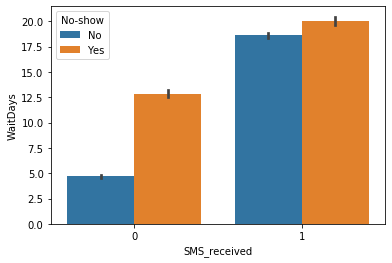

In [15]:
sns.barplot(y="WaitDays", x="SMS_received", hue="No-show", data=train)

Non sembra che ci siano differenze in base al genere. Infatti la forma dei grafici è molto simile. L'unica differenza è che l'utenza femminile è molto più grande di quella maschile. 

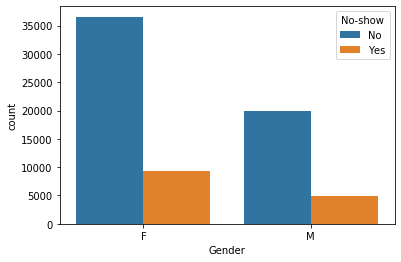

In [16]:
sns.countplot(x="Gender", hue="No-show", data=train)

Nell'area in basso a sinistra si può notare come le persone più giovani tendono ad avere meno pazienza di quelle più anziane. Infatti applicando gli stesso valori di `WaitDays` si osservano più valori 'Yes' nel campo `No-Show`.
Inoltre da questo grafico emerge il fatto che chi riceve più tardi le cure di solito sono le persone sopra i 40 anni. Infatti ci sono molti casi di ritardi pari anche a più di 125 giorni.

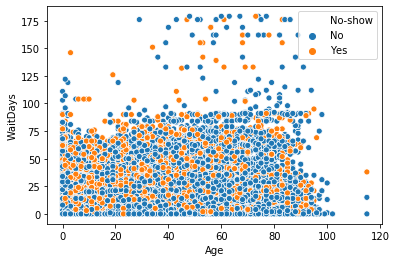

In [17]:
sns.scatterplot(y="WaitDays", x="Age", hue="No-show", data=train)

Dai grafici sembra che chi ha uno `Scholarship` tenda o a dimenticarsi più spesso degli appuntamenti o ad avere meno pazienza ai ritardi. Inoltre chi ha tale servizio riesce sempre ad avere valori di `WaitDays` più piccoli di chi non attiva questo servizio

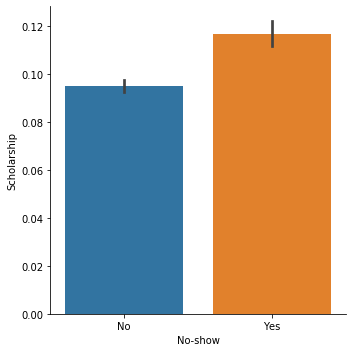

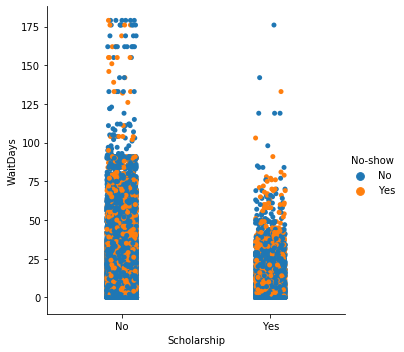

In [18]:
sns.catplot(x="No-show", y="Scholarship", kind="bar", data=train)

plot_train = train.copy()
plot_train.Scholarship = plot_train.Scholarship.map({1:"Yes", 0:"No"})
sns.catplot(y="WaitDays", x="Scholarship", hue="No-show", data=plot_train)

# Modellazione
Dopo aver analizzato un minimo i dati ed effettuate alcune pulizie di base, si proverà a definire un modello che predica nuove casistiche

In [19]:
train_raw = train.copy()
test_raw = test.copy()
train_raw.shape, test_raw.shape

y_train = train_raw["No-show"].map({"Yes":1, "No":0})
X_train = train_raw.drop(labels=["No-show"], axis=1)

y_test = test_raw["No-show"].map({"Yes":1, "No":0})
X_test = test_raw.drop(labels=["No-show"], axis=1)

### Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#### da verificare
Uso l'encoder sia su `Gender` che su `Neighbourhood` visto che sono categoriche. Su `Gender` il test set dovrebbe presentare le stesse due categorie.
Invece se su `Neighbourhood` si presentano nuove categorie l'encoder non saprebbe come gestirle e darebbe errore. Tale comportamento è desiderato, in fin dei conti, perché il modello se trova un nuovo `Neighbourhood` non saprebbe come classificarlo. Se si forzasse la mano usando `fit_transform` anche sul test set il modello potrebbe dover lavorare con valori per cui non è stato tarato.
Quindi si evita di fare `fit_transform` anche sul test set per evitare comportamenti anomali

In [21]:
categorical_cols= ['Gender', 'Neighbourhood']#X_train.select_dtypes(exclude=["number"]).columns
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col]) #se ci sono nuovi neighbourhood non posso gestirli

Non uso l'encoder sui campi che contengono date, questo perché è molto probabile che nel test set ci siano date non presenti nel train set. Quindi si prende una data come riferimento (es. la data più piccola del train set) e la si sottrae al dataset. In questa maniera si ottengono quanti giorni (di tipo intero) sono passati da quella data in maniera compatta. Alternativamente si poteva spezzare la data nelle sue componenti giorno-mese-anno. Però così si sarebbe aggiunte 4 nuove feature che avrebbero appesantito il modello

In [22]:
date_cols = ['ScheduledDay', 'AppointmentDay']
min_day = X_train.ScheduledDay.min()
    
for col in date_cols:
    X_train[col] = (X_train[col] - min_day).dt.days
    X_test[col] =  (X_test[col] - min_day).dt.days

### Training
provo un insieme di classificatori così da scegliere quale utilizzerà per fare ottimizzazione degli iper-parametri

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

answer_to_life_universe_everything=42

models = [ 
            ('DecisionTree', DecisionTreeClassifier(random_state=answer_to_life_universe_everything)), 
            ('LogisticRegression', LogisticRegression(random_state=answer_to_life_universe_everything)),
            ('Knn', KNeighborsClassifier())
         ]

In [24]:
from sklearn.model_selection import cross_val_score

for name, model in models:
    print(name, 'scored:', cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=4).mean())


DecisionTree scored: 0.7199304231934892
LogisticRegression scored: 0.7932594495948364
Knn scored: 0.7703432889192339


## Calibrazione parametri
A questo punto si utilizzerà come modello di base la `LogisticRegression`. Infatti è quella che ha dato il risultato migliore sulla cross-validation applicata al train set.
Per ottimizzare ancora di più la predizione si cercherà di sistemare il valore di alcuni dei parametri di ingresso. Per fare questo si applicherà nuovamente la cross-validation e si sceglieranno i parametri migliori in base ai risultati ottenuti

In [25]:
#definizione delle varie combinazioni di parametri da applicare
regularizations = [0.01, 0.1, 1, 10, 100]
intercepts = [True, False]
iterations = [20, 50, 100, 300, 500]
tolerances = [1e-5, 1e-4, 1e-2, 1]

from itertools import product
parameters = product(regularizations, intercepts, iterations, tolerances)

In [26]:
#cross-validation su tutte le combinazioni dei parametri
scores = []
for parameter in parameters:
    regularization, intercept, iteration, tolerance = parameter
    model = LogisticRegression(
        C=regularization, 
        fit_intercept=intercept, 
        max_iter=iteration,
        tol=tolerance,
        random_state=answer_to_life_universe_everything
    )
    score = cross_val_score(
        estimator=model, 
        X=X_train, 
        y=y_train,
        cv=5,
        n_jobs=4
    ).mean()
    scores.append((regularization, intercept, iteration, tolerance, score))

In [27]:
scores[:5]

[(0.01, True, 20, 1e-05, 0.7916760930141427),
 (0.01, True, 20, 0.0001, 0.7916760930141427),
 (0.01, True, 20, 0.01, 0.7916760930141427),
 (0.01, True, 20, 1, 0.7916760930141427),
 (0.01, True, 50, 1e-05, 0.7931887642294779)]

# Analisi parametri
Sembra che ci siano poche differenze tra i vari test effettuati. Comunque verrà effettuta un analisi per vedere quale scelta sarà la migliore

In [28]:
scores_data = pd.DataFrame(scores, columns=["C", "fit_intercept", "max_iter", "tol", "score"])
scores_data

,C,fit_intercept,max_iter,tol,score
0,0.01,True,20,0.00001,0.791676
1,0.01,True,20,0.00010,0.791676
2,0.01,True,20,0.01000,0.791676
3,0.01,True,20,1.00000,0.791676
4,0.01,True,50,0.00001,0.793189
...,...,...,...,...,...
195,100.00,False,300,1.00000,0.793330
196,100.00,False,500,0.00001,0.793330
197,100.00,False,500,0.00010,0.793330
198,100.00,False,500,0.01000,0.793330


Sembra che le migliori scelte dei parametri siano praticamente identiche ai parametri di default

In [29]:
scores_data[scores_data.score >= scores_data.score.max()]

,C,fit_intercept,max_iter,tol,score
48,0.1,True,100,0.00001,0.793387
49,0.1,True,100,0.00010,0.793387
50,0.1,True,100,0.01000,0.793387
51,0.1,True,100,1.00000,0.793387


Il valore migliore per C sembra essere 0.1, infatti in corrispondenza di tale valore si ottiene il valore massimo nello score

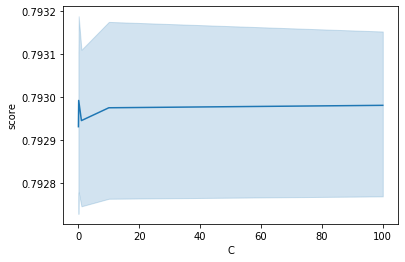

In [30]:
sns.lineplot(x="C", y="score", data=scores_data)

In questo caso da 100 iterazione in poi qualsiasi valore è equivalente. Si sceglie il valore 100 così da rendere più efficiente l'esecuzione del processo di learning. Anche se alla fine il fitting nel caso peggiore richiede una decina di secondi. Quindi non è ancora necessario fare ottimizzazioni più "estreme", visto che si rischia di degradare le performance in produzione

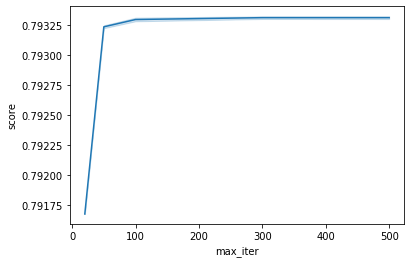

In [31]:
sns.lineplot(x="max_iter", y="score", data=scores_data)

i valori di tolerance applicati non cambiano in alcun modo lo score finale. Si potrebbe valutare di prendere un valore alto per avere un training veloce, però visto che su questo dataset il tempo di esecuzione del fit non è così alto alla fine non influisce in maniera significativa neanche sull'efficienza del processo di learning

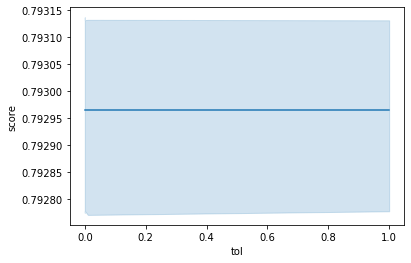

In [32]:
sns.lineplot(x="tol", y="score", data=scores_data)

Lasciare all'algoritmo di learning di scegliere il parametro dell'intercetta sembra garantire risultati più soddisfacenti

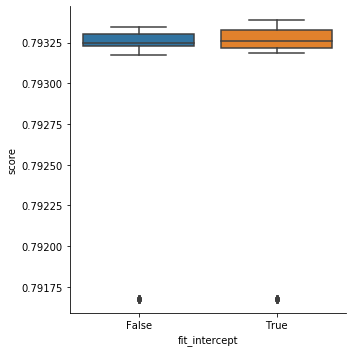

In [33]:
sns.catplot(x="fit_intercept", y="score", kind="box", data=scores_data);

# Test finale
Si conclude la realizzazione del modello. A questo punto non si applica la cross-validation sul training set in modo tale da poter utilizzare l'intero training set per l'addestramento del modello. Infine si calcola lo score sul test set

In [34]:
final_model = LogisticRegression(
    C=0.1,
    fit_intercept=True,
    max_iter = 100,
    tol = 1e-4,
    random_state=answer_to_life_universe_everything
).fit(X_train, y_train)
final_model.score(X_test, y_test)

0.7943454905286966

# Conclusioni
Dopo aver definito il modello finale è interessante vedere come le analisi a monte rispecchino, almeno in parte ciò che il modello ha inferito dal dataset.
Nel processo decisionale si può notare che le feature più importanti sono:
- Scholarship, ovvero se hanno l'assicurazione familiare
- WaitDays, ovvero se ha aspettato molto tra prenotazione e visita
- Età, più è alta e più è probabile che NON disdica l'appuntamento (o che non si presenti)
- SMS_received, ovvero se ha ricevuto almeno un messaggio

Quindi il profilo tipico di chi salterebbe la visita è una persona con che ha l'assicurazione, che è stato notificato una o più volte via sms, che sia giovane e abbia dovuto aspettare molto per la visita effettiva.

Non sembrano essere decisive invece le feature riguardanti le malattie che il paziente può avere. Inoltre come si è visto all'inizio il genere non conta molto rispetto alla decisione finale

In [35]:
import numpy as np
coef = np.std(X_test, 0) * final_model.coef_[0] # si prendono i coefficienti e per ottenere una stima migliore
                                                # li si moltiplicano per la deviazione standard
feature_importance = pd.Series(coef).values.reshape(1,12)
feature = pd.DataFrame(feature_importance, columns=X_train.columns)
feature

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitDays
0,-0.009217,-0.027187,-0.078624,-0.169825,-0.028461,0.076928,-0.004559,0.019118,0.021173,0.002189,0.177823,0.336252
